In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [16]:
bos=pd.read_csv("boston.csv")
bos.head(10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [17]:
bos.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


#### there are no missing values 

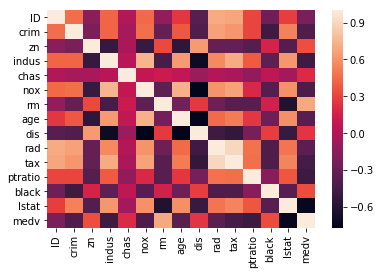

In [55]:
sns.heatmap(bos.corr())

#### After plotting a heatmap the following factors seem to influence the value of target more..

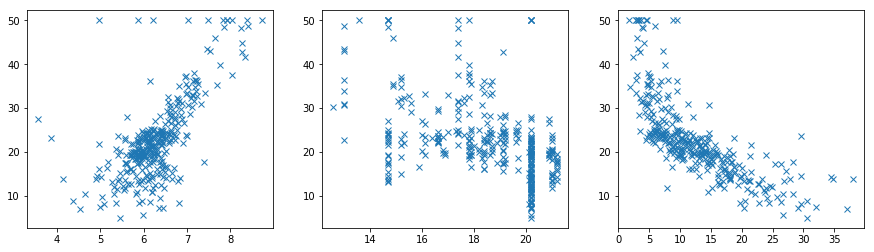

In [56]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(bos["rm"],bos["medv"],'x')
plt.subplot(1,3,2)
plt.plot(bos["ptratio"],bos["medv"],'x')
plt.subplot(1,3,3)
plt.plot(bos["lstat"],bos["medv"],'x')

#### we can observe a positive correlation between rm and medv whereas in the other two plots there is an inverse relationship

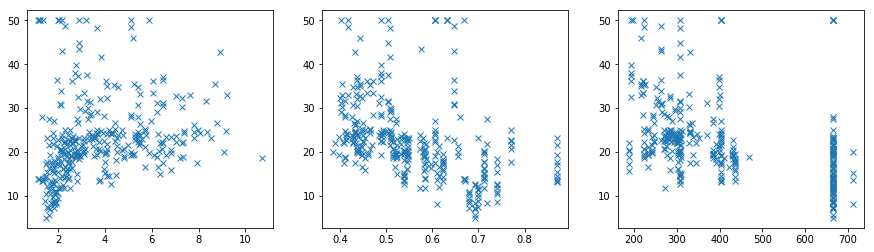

In [58]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(bos["dis"],bos["medv"],'x')
plt.subplot(1,3,2)
plt.plot(bos["nox"],bos["medv"],'x')
plt.subplot(1,3,3)
plt.plot(bos["tax"],bos["medv"],'x')

#### again there is  positive correlation between dis and medv ,and for the other two there is an inverse relation

In [44]:
X=bos[["rm","lstat","ptratio","dis","nox","tax"]]
Y=bos["medv"]

In [59]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

In [60]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,random_state=1,test_size=1/5)

In [61]:
my_regf=RandomForestRegressor(max_depth=10,min_samples_split=5,random_state=1)
my_regf.fit(X_train,Y_train)
predf=my_regf.predict(X_val)
print(r2_score(Y_val,predf))

0.8377244833900919


#### r2_score(Coefficient of detremination-R_squared) is the regression metric used to evaluate a regression model 

In [62]:
import statsmodels.api as sm
model1=sm.OLS(Y_train,X_train)
result=model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     933.1
Date:                Mon, 19 Nov 2018   Prob (F-statistic):          1.07e-172
Time:                        16:31:21   Log-Likelihood:                -818.56
No. Observations:                 266   AIC:                             1649.
Df Residuals:                     260   BIC:                             1671.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             6.1789      0.425     14.538      0.0

#### above code is implemented to view the adjusted R_squared value which is more proper compared to R_squared method

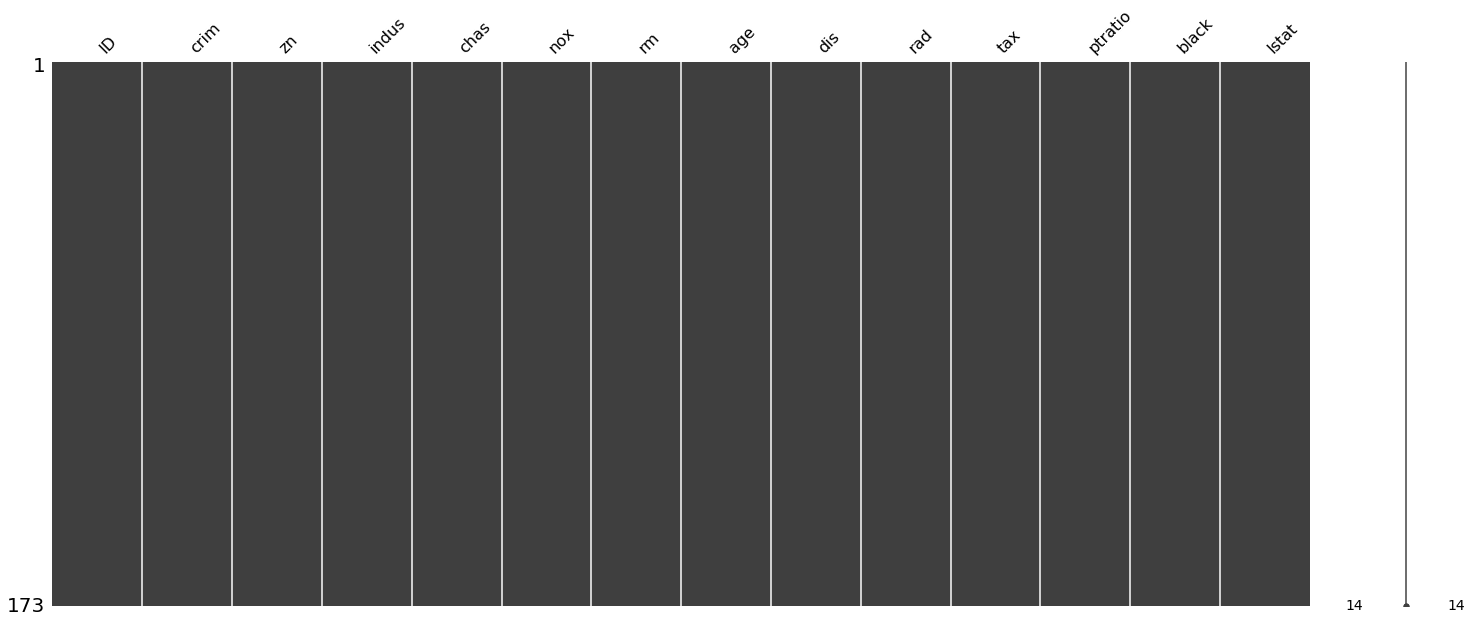

In [63]:
bos_test=pd.read_csv("test_bos.csv")
ms.matrix(bos_test)

In [64]:
Xt=bos_test[["rm","lstat","ptratio","dis","nox","tax"]]
ID =np.array(bos_test["ID"]).astype(int)


In [65]:
Yt1=my_regf.predict(Xt)
resf = pd.DataFrame(Yt1,ID, columns = ["medv"])
resf.to_csv("resf_bos.csv",index_label=["ID"])

In [66]:
pd.read_csv("resf_bos.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
ID      173 non-null int64
medv    173 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.7 KB
